#### https://online.stat.psu.edu/stat501/lesson/11

#### A data point can be influential in 2 ways: outlier, leverage

Leverage: it has extreme x values <br>
Outlier: a data point is extreme with respect to the other y values

In [1]:
import os
import statsmodels.api as sm
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import Image
from statsmodels.formula.api import ols
import scipy.stats
from matplotlib import pyplot as plt
filedir = 'STAT501_Lesson11'
os.listdir(filedir)

['influence2.txt',
 'influence3.txt',
 'influence1.txt',
 'influence4.txt',
 'leverage_example.png',
 'leverage_explain.png',
 'deleted_point.png',
 'outlier_example.png',
 'hospital_infct_03.txt']

In [2]:
Image(url=os.path.join(filedir, "leverage_example.png"), width=600, height=600)

In [3]:
Image(url=os.path.join(filedir, "outlier_example.png"), width=600, height=600)

#### It's easy to plot and observe it when SLR; but we need measures to determine it when MLR

#### 1. Leverage

$$
Y = X \beta + \epsilon
$$

$$
\hat{y} = Xb
$$

$$
b = (X^T X)^{-1} X^T y
$$

Therefore, we can express $\hat{y}$ in an alternative way:
$$
\hat{y} = X (X^T X)^{-1} X^T y = Hy
$$

In [4]:
Image(url=os.path.join(filedir, "leverage_explain.png"), width=600, height=600)

<ol>
    <li>The leverage $h_ii$ is a measure of the distance between the ith x value and the mean of all the x values</li>
    <li>The leverage $h_ii$ is a number between 0 and 1, inclusive</li>
    <li>The sum of the $h_ii$ equals the number of parameters</li>
</ol>

In [5]:
df = pd.read_table(os.path.join(filedir, 'influence2.txt'), encoding="utf-8")
df

,Row,x,y
0,1,0.10000,-0.0716
1,2,0.45401,4.1673
2,3,1.09765,6.5703
3,4,1.27936,13.8150
4,5,2.20611,11.4501
5,6,2.50064,12.9554
6,7,3.04030,20.1575
7,8,3.23583,17.5633
8,9,4.45308,26.0317
9,10,4.16990,22.7573


In [6]:
X = df[['x']]
X = sm.add_constant(X)
y = df['y']

/Users/yuehuazhuang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [7]:
H = X.values @ np.linalg.inv(X.T @ X) @ X.T
H

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.176297,0.166503,0.148695,0.143668,0.118028,0.109880,0.094949,0.089540,0.055863,0.063697,...,0.024343,0.015253,-0.005213,-0.009055,-0.041698,-0.053759,-0.062078,-0.061677,-0.074488,0.068398
1,0.166503,0.157454,0.141002,0.136358,0.112669,0.105141,0.091347,0.086349,0.055235,0.062474,...,0.026114,0.017717,-0.001192,-0.004741,-0.034900,-0.046043,-0.053729,-0.053358,-0.065194,0.066816
2,0.148695,0.141002,0.127015,0.123066,0.102926,0.096525,0.084797,0.080548,0.054095,0.060249,...,0.029335,0.022196,0.006120,0.003102,-0.022540,-0.032013,-0.038548,-0.038233,-0.048296,0.063941
3,0.143668,0.136358,0.123066,0.119313,0.100175,0.094092,0.082948,0.078910,0.053773,0.059620,...,0.030245,0.023460,0.008184,0.005316,-0.019050,-0.028053,-0.034263,-0.033963,-0.043526,0.063129
4,0.118028,0.112669,0.102926,0.100175,0.086145,0.081687,0.073517,0.070557,0.052130,0.056417,...,0.034883,0.029909,0.018711,0.016608,-0.001253,-0.007853,-0.012405,-0.012185,-0.019195,0.058989
5,0.109880,0.105141,0.096525,0.094092,0.081687,0.077744,0.070520,0.067902,0.051608,0.055399,...,0.036357,0.031959,0.022056,0.020197,0.004403,-0.001433,-0.005458,-0.005264,-0.011463,0.057673
6,0.094949,0.091347,0.084797,0.082948,0.073517,0.070520,0.065028,0.063038,0.050651,0.053533,...,0.039058,0.035714,0.028186,0.026773,0.014766,0.010330,0.007270,0.007418,0.002705,0.055262
7,0.089540,0.086349,0.080548,0.078910,0.070557,0.067902,0.063038,0.061276,0.050305,0.052857,...,0.040036,0.037075,0.030407,0.029156,0.018521,0.014592,0.011882,0.012012,0.007839,0.054388
8,0.055863,0.055235,0.054095,0.053773,0.052130,0.051608,0.050651,0.050305,0.048147,0.048649,...,0.046128,0.045546,0.044234,0.043988,0.041897,0.041124,0.040591,0.040617,0.039796,0.048950
9,0.063697,0.062474,0.060249,0.059620,0.056417,0.055399,0.053533,0.052857,0.048649,0.049628,...,0.044711,0.043575,0.041018,0.040538,0.036459,0.034952,0.033912,0.033962,0.032362,0.050215


In [8]:
np.diag(H).sum()

2.0

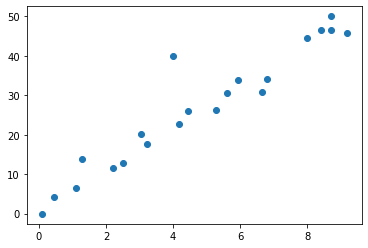

In [9]:
plt.scatter(df['x'],df['y'])

In [10]:
k = 2
n = 21
h_mean = k / n

In [11]:
h_threshold = 2 * h_mean

In [12]:
h_mean

0.09523809523809523

In [13]:
np.diag(H) > h_threshold

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [14]:
df = pd.read_table(os.path.join(filedir, 'influence3.txt'), encoding="utf-8")
X = df[['x']]
X = sm.add_constant(X)
y = df['y']

/Users/yuehuazhuang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [15]:
H = X.values @ np.linalg.inv(X.T @ X) @ X.T
k = np.diag(H).sum()
n = len(y)
h_mean = k / n
h_threshold = 2 * h_mean

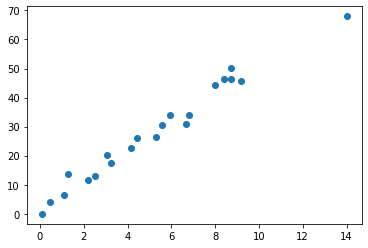

In [16]:
plt.scatter(df['x'],df['y'])

In [17]:
np.diag(H) > h_threshold

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True])

#### 2. Outliers

Studentized residuals: $r_i = \frac{e_i}{s(e_i)} = \frac{e_i}{\sqrt{MSE(1-h_{ii})}}$

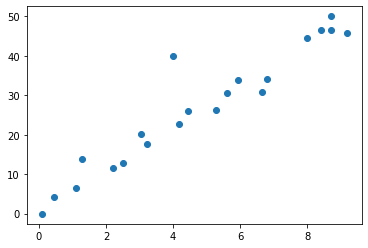

In [18]:
df = pd.read_table(os.path.join(filedir, 'influence2.txt'), encoding="utf-8")
plt.scatter(df['x'],df['y'])

In [19]:
df['intercept'] = 1
model = ols('y ~ intercept + x', data=df).fit()
sm.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
intercept,1.0,763.293411,763.293411,34.396273,1.197685e-05
x,1.0,3517.683361,3517.683361,158.517281,1.146460e-10
Residual,19.0,421.632163,22.191166,NaN,NaN


In [20]:
MSE = sm.stats.anova_lm(model).loc['Residual', 'mean_sq']
resids = model.resid
X = df[['intercept','x']]
y = df['y']
h_ii = np.diag(X.values @ np.linalg.inv(X.T @ X) @ X.T) 

In [21]:
resids / np.sqrt(MSE * (1-h_ii))

0    -0.826351
1    -0.249154
2    -0.435445
3     0.998187
4    -0.581904
5    -0.574462
6     0.413791
7    -0.371226
8     0.139767
9    -0.262514
10   -0.713173
11   -0.095897
12    0.252734
13   -1.229353
14   -0.683161
15    0.292644
16    0.262144
17    0.731458
18   -0.055615
19   -0.776800
20    3.681098
dtype: float64

Empirical rule: if the value > 2 (> 3)

In [22]:
model.outlier_test()

,student_resid,unadj_p,bonf(p)
0,-0.819167,0.423405,1.000000
1,-0.242905,0.810825,1.000000
2,-0.425962,0.675186,1.000000
3,0.998087,0.331467,1.000000
4,-0.571499,0.574729,1.000000
5,-0.564060,0.579674,1.000000
6,0.404582,0.690552,1.000000
7,-0.362643,0.721095,1.000000
8,0.136110,0.893245,1.000000
9,-0.255977,0.800871,1.000000


#### 3. Deleted Residuals: one problem is when there's a potential outlier that is so impactful, it can pull the whole model towards itself, so that it isn't flagged as an outlier

The logic is simple, make predictions of y; remove one point, make predictions again. If the difference is significant, the deleted point is influential

In [23]:
Image(url=os.path.join(filedir, "deleted_point.png"), width=600, height=600)

<ol>
    <li>Studentized deleted residuals (or externally studentized residuals)</li>
    <li>Difference in fits (DFFITS)</li>
    <li>Cook's distance</li>
</ol>

In [24]:
influence = model.get_influence()

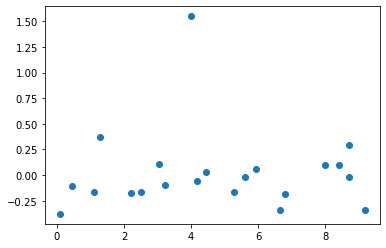

In [30]:
dffit = influence.dffits
plt.scatter(df.x, dffit[0])

In [26]:
cooks = influence.cooks_distance

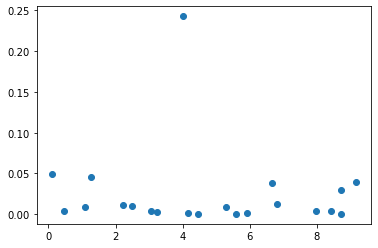

In [27]:
plt.scatter(df.x, cooks[0])

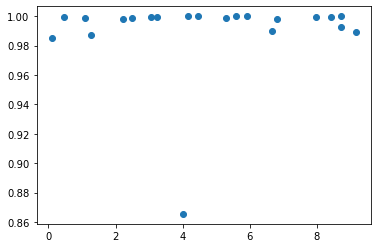

In [28]:
plt.scatter(df.x, cooks[1])